In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/point_history_classifier/point_history.csv'
# dataset = 'model/point_history_classifier/point_history.csv'
model_save_path = 'model/point_history_classifier/point_history_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 3

# 入力長

In [4]:
TIME_STEPS = 16
# DIMENSION = 4
DIMENSION = 4
HANDEDNESS_FLAG=0

# 学習データ読み込み

In [19]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (TIME_STEPS * DIMENSION ) + HANDEDNESS_FLAG + 1)))

In [20]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [23]:
use_lstm = True
model = None

if use_lstm:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION + HANDEDNESS_FLAG, )),
        tf.keras.layers.Reshape((TIME_STEPS, DIMENSION), input_shape=(TIME_STEPS * DIMENSION + HANDEDNESS_FLAG, )), 
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.LSTM(16, input_shape=[TIME_STEPS, DIMENSION, HANDEDNESS_FLAG]),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])
else:
    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(TIME_STEPS * DIMENSION + HANDEDNESS_FLAG, )),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(24, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
    ])

In [24]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 16, 4)             0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 4)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                1344      
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 33        
Total params: 1,547
Trainable params: 1,547
Non-trainable params: 0
____________________________________________________

In [25]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [26]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [27]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
9/9 [==============================] - 2s 50ms/step - loss: 1.0913 - accuracy: 0.6358 - val_loss: 1.0788 - val_accuracy: 0.7011

Epoch 00001: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 2/1000
9/9 [==============================] - 0s 11ms/step - loss: 1.0696 - accuracy: 0.6948 - val_loss: 1.0586 - val_accuracy: 0.6739

Epoch 00002: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 3/1000
9/9 [==============================] - 0s 12ms/step - loss: 1.0461 - accuracy: 0.6721 - val_loss: 1.0360 - val_accuracy: 0.6332

Epoch 00003: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 4/1000
9/9 [==============================] - 0s 9ms/step - loss: 1.0203 - accuracy: 0.6540 - val_loss: 1.0071 - val_accuracy: 0.6141

Epoch 00004: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 5/1000
9/9 [==============================] - 0s 9ms/step - loss: 0

9/9 [==============================] - 0s 11ms/step - loss: 0.3132 - accuracy: 0.9137 - val_loss: 0.3501 - val_accuracy: 0.8940

Epoch 00036: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 37/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.3292 - accuracy: 0.9155 - val_loss: 0.3546 - val_accuracy: 0.8913

Epoch 00037: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 38/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.3287 - accuracy: 0.9164 - val_loss: 0.3365 - val_accuracy: 0.8940

Epoch 00038: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 39/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.3109 - accuracy: 0.9173 - val_loss: 0.3558 - val_accuracy: 0.8859

Epoch 00039: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 40/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.3121 - 

9/9 [==============================] - 0s 9ms/step - loss: 0.2414 - accuracy: 0.9310 - val_loss: 0.2783 - val_accuracy: 0.8913

Epoch 00071: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 72/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2458 - accuracy: 0.9310 - val_loss: 0.2743 - val_accuracy: 0.8995

Epoch 00072: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 73/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2405 - accuracy: 0.9319 - val_loss: 0.2818 - val_accuracy: 0.8940

Epoch 00073: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 74/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2476 - accuracy: 0.9264 - val_loss: 0.2714 - val_accuracy: 0.8913

Epoch 00074: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 75/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2325 - ac

9/9 [==============================] - 0s 10ms/step - loss: 0.2267 - accuracy: 0.9310 - val_loss: 0.2225 - val_accuracy: 0.9239

Epoch 00106: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 107/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2009 - accuracy: 0.9355 - val_loss: 0.2364 - val_accuracy: 0.9076

Epoch 00107: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 108/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2055 - accuracy: 0.9346 - val_loss: 0.2254 - val_accuracy: 0.9239

Epoch 00108: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 109/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2230 - accuracy: 0.9355 - val_loss: 0.2164 - val_accuracy: 0.9239

Epoch 00109: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 110/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.2128

9/9 [==============================] - 0s 10ms/step - loss: 0.1812 - accuracy: 0.9455 - val_loss: 0.1808 - val_accuracy: 0.9538

Epoch 00141: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 142/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1820 - accuracy: 0.9437 - val_loss: 0.1714 - val_accuracy: 0.9565

Epoch 00142: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 143/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.1821 - accuracy: 0.9473 - val_loss: 0.1714 - val_accuracy: 0.9565

Epoch 00143: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 144/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.1799 - accuracy: 0.9410 - val_loss: 0.2014 - val_accuracy: 0.9375

Epoch 00144: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 145/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.20

9/9 [==============================] - 0s 10ms/step - loss: 0.1728 - accuracy: 0.9510 - val_loss: 0.1429 - val_accuracy: 0.9511

Epoch 00176: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 177/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1643 - accuracy: 0.9491 - val_loss: 0.1523 - val_accuracy: 0.9484

Epoch 00177: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 178/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1592 - accuracy: 0.9510 - val_loss: 0.1520 - val_accuracy: 0.9565

Epoch 00178: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 179/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1717 - accuracy: 0.9555 - val_loss: 0.1424 - val_accuracy: 0.9538

Epoch 00179: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 180/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.17

9/9 [==============================] - 0s 10ms/step - loss: 0.1463 - accuracy: 0.9573 - val_loss: 0.1368 - val_accuracy: 0.9511

Epoch 00211: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 212/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1520 - accuracy: 0.9546 - val_loss: 0.1221 - val_accuracy: 0.9538

Epoch 00212: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 213/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1402 - accuracy: 0.9591 - val_loss: 0.1155 - val_accuracy: 0.9565

Epoch 00213: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 214/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1412 - accuracy: 0.9582 - val_loss: 0.1240 - val_accuracy: 0.9538

Epoch 00214: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 215/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.15

9/9 [==============================] - 0s 9ms/step - loss: 0.1371 - accuracy: 0.9555 - val_loss: 0.1070 - val_accuracy: 0.9620

Epoch 00246: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 247/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1357 - accuracy: 0.9573 - val_loss: 0.1039 - val_accuracy: 0.9647

Epoch 00247: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 248/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.1218 - accuracy: 0.9646 - val_loss: 0.1072 - val_accuracy: 0.9647

Epoch 00248: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 249/1000
9/9 [==============================] - 0s 8ms/step - loss: 0.1203 - accuracy: 0.9609 - val_loss: 0.1054 - val_accuracy: 0.9647

Epoch 00249: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 250/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1415

9/9 [==============================] - 0s 10ms/step - loss: 0.1335 - accuracy: 0.9655 - val_loss: 0.1086 - val_accuracy: 0.9592

Epoch 00281: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 282/1000
9/9 [==============================] - 0s 9ms/step - loss: 0.1233 - accuracy: 0.9637 - val_loss: 0.0907 - val_accuracy: 0.9674

Epoch 00282: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 283/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1149 - accuracy: 0.9628 - val_loss: 0.0900 - val_accuracy: 0.9728

Epoch 00283: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 284/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1348 - accuracy: 0.9628 - val_loss: 0.0896 - val_accuracy: 0.9728

Epoch 00284: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 285/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.132

9/9 [==============================] - 0s 10ms/step - loss: 0.1216 - accuracy: 0.9646 - val_loss: 0.0782 - val_accuracy: 0.9728

Epoch 00316: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 317/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.1049 - accuracy: 0.9728 - val_loss: 0.0778 - val_accuracy: 0.9755

Epoch 00317: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 318/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.0961 - accuracy: 0.9737 - val_loss: 0.0833 - val_accuracy: 0.9728

Epoch 00318: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 319/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.0967 - accuracy: 0.9728 - val_loss: 0.0804 - val_accuracy: 0.9728

Epoch 00319: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 320/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.11

9/9 [==============================] - 0s 11ms/step - loss: 0.0974 - accuracy: 0.9655 - val_loss: 0.0737 - val_accuracy: 0.9755

Epoch 00351: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 352/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.1051 - accuracy: 0.9700 - val_loss: 0.0685 - val_accuracy: 0.9755

Epoch 00352: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 353/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.0995 - accuracy: 0.9673 - val_loss: 0.0631 - val_accuracy: 0.9755

Epoch 00353: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 354/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.0962 - accuracy: 0.9709 - val_loss: 0.0747 - val_accuracy: 0.9755

Epoch 00354: saving model to model/point_history_classifier\point_history_classifier.hdf5
Epoch 355/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.11

In [28]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [29]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

[6.3803856e-04 1.9982146e-02 9.7937977e-01]
2


# 混同行列

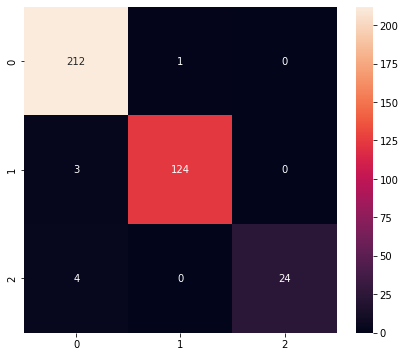

Classification Report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       213
           1       0.99      0.98      0.98       127
           2       1.00      0.86      0.92        28

    accuracy                           0.98       368
   macro avg       0.99      0.94      0.96       368
weighted avg       0.98      0.98      0.98       368



In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [31]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)
model = tf.keras.models.load_model(model_save_path)

In [32]:
tflite_save_path = 'model/point_history_classifier/point_history_classifier.tflite'

In [33]:
# モデルを変換(量子化
converter = tf.lite.TFLiteConverter.from_keras_model(model)  # converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\HUNGDU~1\AppData\Local\Temp\tmp2jp6r31z\assets


INFO:tensorflow:Assets written to: C:\Users\HUNGDU~1\AppData\Local\Temp\tmp2jp6r31z\assets


16352

# 推論テスト

In [34]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [35]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print(input_details)

[{'name': 'serving_default_input_2:0', 'index': 0, 'shape': array([ 1, 64]), 'shape_signature': array([-1, 64]), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


In [36]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [37]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

Wall time: 1.99 ms


In [38]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.35534113e-04 1.36258025e-02 9.85838711e-01]
2


In [39]:
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 

from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [40]:
pipelines = {
    'lr':make_pipeline(StandardScaler(), LogisticRegression()),
    'rc':make_pipeline(StandardScaler(), RidgeClassifier()),
    'rf':make_pipeline(StandardScaler(), RandomForestClassifier()),
    'gb':make_pipeline(StandardScaler(), GradientBoostingClassifier()),
}

In [41]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model1 = pipeline.fit(X_train, y_train)
    fit_models[algo] = model1

c:\users\hungduong\miniconda3\envs\hand\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [42]:
from sklearn.metrics import accuracy_score # Accuracy metrics 
import pickle

In [43]:
for algo, model1 in fit_models.items():
    yhat = model1.predict(X_test)
    print(algo, accuracy_score(y_test, yhat))

lr 0.6467391304347826
rc 0.6467391304347826
rf 1.0
gb 0.9891304347826086


In [44]:
with open('model/point_history_classifier/point_history_classifiergb.pkl', 'wb') as f:
    pickle.dump(fit_models['gb'], f)